In [1]:
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [2]:
import os
data_path = os.getcwd()+'/'
print(data_path)

/Users/daxfeliz/Desktop/


In [3]:
# donovan = A
# jashcelyn = B
# august = C



df = pd.read_csv(data_path+'SRMP_project/SRMP_target_list_B.csv')

In [4]:
df.head()

,Unnamed: 0,TIC ID,Observed Sectors [String],N Sectors Observed,dist,ra,dec,eclat,eclong,Teff,logg,M_star,R_star,rho,Tmag,Vmag,Gmag,rmag,imag,Zmag,Hmag,Kmag,Period [days],Depth,T0,Transit Duration [days]
0,0,396562848,"Sector 18, Sector 19, Sector 25, Sector 26",4.0,18.2276,44.326080,76.553125,55.862815,72.756004,3414.0,4.97292,NaN,0.260187,13.16950,11.0548,13.304,12.2598,12.9473,14.8547,12.3572,9.028,8.767,1.949521,0.002185,1792.603719,0.02816
1,1,436678563,Sector 5,1.0,25.8434,73.458537,15.820910,-6.703732,73.989733,3447.0,4.85850,0.305,0.305000,7.19430,10.9231,13.205,12.1101,NaN,NaN,NaN,8.892,8.617,585.700000,0.005100,NaN,NaN
2,2,458451774,Sector 22,1.0,39.2687,193.824762,44.523913,45.325426,169.956136,3476.0,4.82238,0.352,0.344000,5.98705,11.5210,13.713,12.6913,13.4846,12.1659,12.1208,9.435,9.242,0.103000,0.002800,NaN,NaN
3,3,116278838,"Sector 16, Sector 23",2.0,35.0873,220.977093,43.596289,55.243171,196.448635,3417.0,4.87830,0.384,0.371000,7.97433,11.7143,14.022,12.9231,14.2986,12.4380,12.2421,9.670,9.439,500.000000,0.015400,NaN,NaN
4,4,452989720,"Sector 17, Sector 18",2.0,38.2558,8.770342,59.885526,49.748397,39.877510,3203.0,4.94586,0.250,0.263000,11.40540,12.7315,16.350,14.0839,NaN,NaN,NaN,10.401,10.166,5.959000,0.004100,NaN,NaN


In [5]:
# from planet_hunter_tools import everything

# cadence='short'
# # cadence='long'


# starname='Kepler-10'
# quarter_number=[3]
# mission='Kepler'

# smoothing_window=1#/24
# Nsigma =  5#number of standard deviations above/below the median to consider a point an outlier
# minP=0.5
# maxP=10
# # maxP=None #if you want to do transit searches out to longest period for at least 3 transit detections
# Nfreq=0.5/1000

# import os
# cwd_path = os.getcwd()+'/SRMP_Planet_Hunting_Data/'
# savepath= cwd_path+starname+'/'

# lc = everything(savepath,starname, mission, quarter_number, cadence, \
#            smoothing_window, Nsigma, minP, maxP, Nfreq)

TIC 458451774 in sectors [22.0]

Number of data products for  TIC 458451774  in  TESS  with  short  cadence and in Sector  22 : 2
Filtered Data Product list:
SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 22 2020   SPOC     120   458451774      0.0

TPF type: <class 'lightkurve.targetpixelfile.TessTargetPixelFile'>
cadence 2.0 minutes
Npts for smoothing: 719
BLS took  1.2347071170806885 seconds


/Users/daxfeliz/Desktop/planet_hunter_tools.py:513: RuntimeWarning: invalid value encountered in double_scalars
  binflux[i] = ((fluxfit[tobin]/(errfit[tobin]**2.0)).sum()) / ((1.0/errfit[tobin]**2.0).sum())
/Users/daxfeliz/Desktop/planet_hunter_tools.py:514: RuntimeWarning: invalid value encountered in double_scalars
  bintime[i] = ((timefit[tobin]/(errfit[tobin]**2.0)).sum()) / ((1.0/errfit[tobin]**2.0).sum())
/Users/daxfeliz/Desktop/planet_hunter_tools.py:515: RuntimeWarning: divide by zero encountered in double_scalars
  binerr[i]  = 1.0 / (np.sqrt( (1.0/errfit[tobin]**2.0)).sum() )


<Figure size 720x720 with 0 Axes>

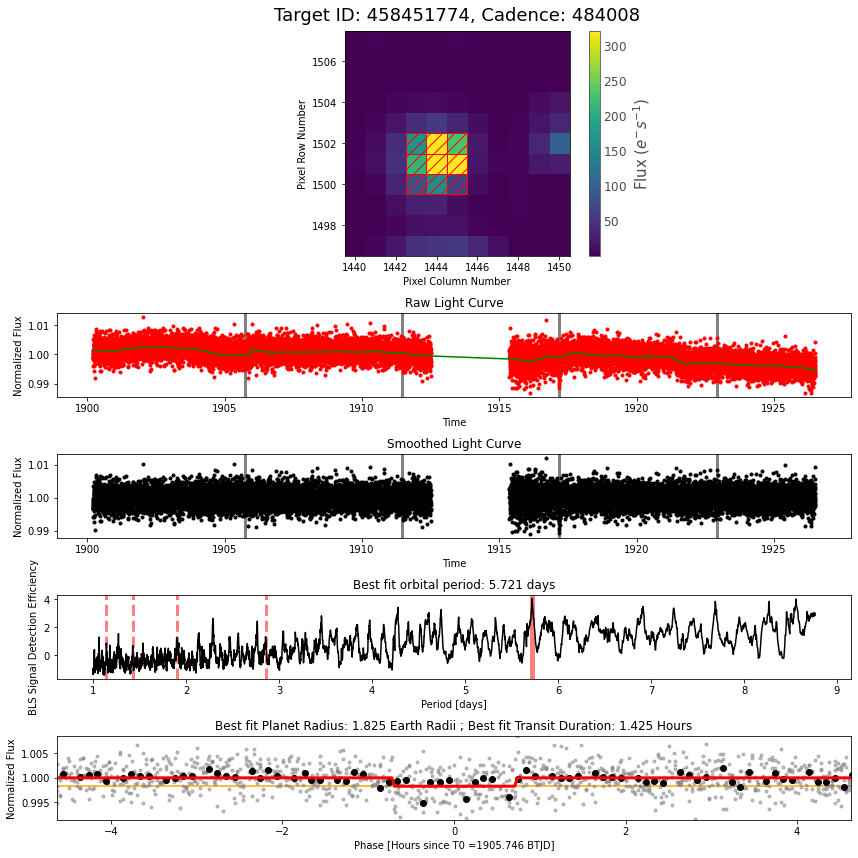

In [6]:

from planet_hunter_tools import everything


mission='TESS'
smoothing_window=1#/24
Nsigma =  5#number of standard deviations above/below the median to consider a point an outlier
minP=1
maxP=13.5
# maxP=None #if you want to do transit searches out to longest period for at least 3 transit detections
Nfreq=0.5/1000

import os
cwd_path = os.getcwd()+'/SRMP_Planet_Hunting_Data/'
cadence='short'

#let's try a random few from this target list
for x in range(2,3):#len(df)):
    ID = str(df['TIC ID'][x])
    M_star = df['M_star'][x]
    R_star = df['R_star'][x]       
    starname ='TIC '+ ID    
    savepath= cwd_path+starname+'/'
    quarter_list=[]
    quarters=df['Observed Sectors [String]'][x].split(',')#[0]#.split(' ')
    for q in range(len(quarters)):
        quarter_list=np.append(quarter_list, int(quarters[q].split(' ')[-1]))
    quarter_list = list(quarter_list)
    print(starname,'in sectors',quarter_list)
    print('')    
    try:
        lc = everything(savepath,starname, M_star,R_star,mission, quarter_list, cadence, \
               smoothing_window, Nsigma, minP, maxP, Nfreq)
    except TypeError as e:
        print('PROBLEM! SEE ERROR BELOW')
        print(e)
        print('PROBLEM! SEE ERROR ABOVE')        
        continue
    print('')

TIC 70597126 in sectors [5.0]

Number of data products for  TIC 70597126  in  TESS  with  short  cadence and in Sector  5 : 2
Filtered Data Product list:
SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 05 2018   SPOC     120    70597126      0.0

TPF type: <class 'lightkurve.targetpixelfile.TessTargetPixelFile'>
cadence 2.0 minutes
Npts for smoothing: 721
BLS took  0.8516201972961426 seconds


/Users/daxfeliz/Desktop/planet_hunter_tools.py:513: RuntimeWarning: invalid value encountered in double_scalars
  binflux[i] = ((fluxfit[tobin]/(errfit[tobin]**2.0)).sum()) / ((1.0/errfit[tobin]**2.0).sum())
/Users/daxfeliz/Desktop/planet_hunter_tools.py:514: RuntimeWarning: invalid value encountered in double_scalars
  bintime[i] = ((timefit[tobin]/(errfit[tobin]**2.0)).sum()) / ((1.0/errfit[tobin]**2.0).sum())
/Users/daxfeliz/Desktop/planet_hunter_tools.py:515: RuntimeWarning: divide by zero encountered in double_scalars
  binerr[i]  = 1.0 / (np.sqrt( (1.0/errfit[tobin]**2.0)).sum() )


<Figure size 720x720 with 0 Axes>

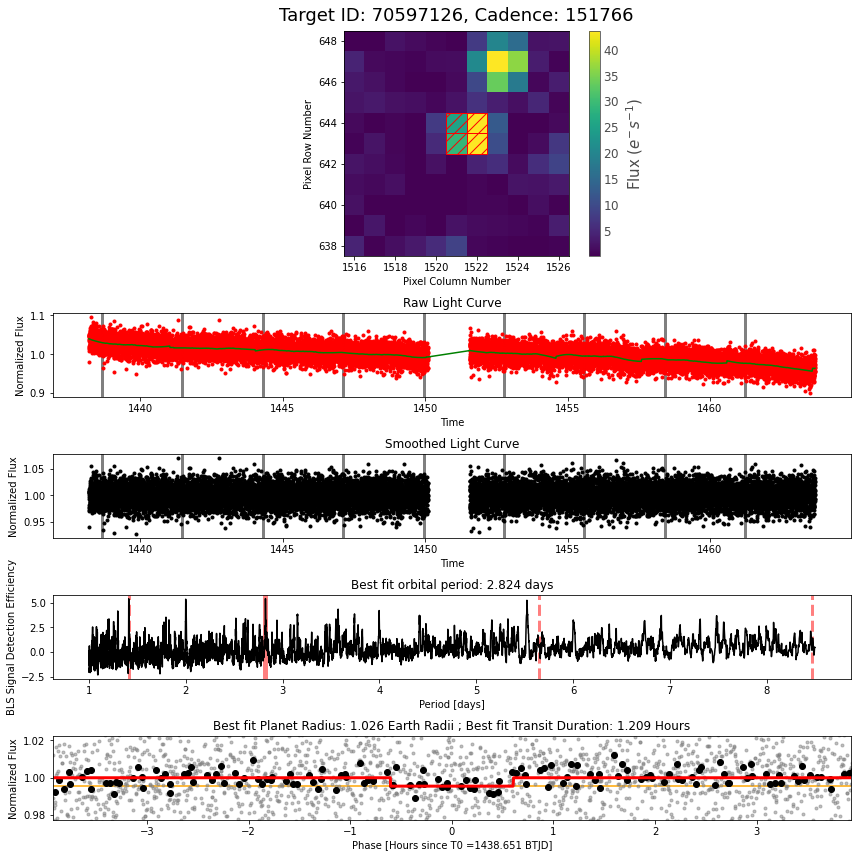

In [7]:
# testing target list A
df = pd.read_csv(data_path+'SRMP_project/SRMP_target_list_A.csv')


from planet_hunter_tools import everything


mission='TESS'
smoothing_window=1#/24
Nsigma =  5#number of standard deviations above/below the median to consider a point an outlier
minP=1
maxP=13.5
# maxP=None #if you want to do transit searches out to longest period for at least 3 transit detections
Nfreq=0.5/1000

import os
cwd_path = os.getcwd()+'/SRMP_Planet_Hunting_Data/'
cadence='short'

#let's try a random few from this target list
for x in range(1):#len(df)):
    ID = str(df['TIC ID'][x])
    M_star = df['M_star'][x]
    R_star = df['R_star'][x]          
    starname ='TIC '+ ID    
    savepath= cwd_path+starname+'/'
    quarter_list=[]
    quarters=df['Observed Sectors [String]'][x].split(',')#[0]#.split(' ')
    for q in range(len(quarters)):
        quarter_list=np.append(quarter_list, int(quarters[q].split(' ')[-1]))
    quarter_list = list(quarter_list)
    print(starname,'in sectors',quarter_list)
    print('')    
    try:
        lc = everything(savepath,starname,M_star,R_star, mission, quarter_list, cadence, \
               smoothing_window, Nsigma, minP, maxP, Nfreq)
    except TypeError as e:
        print('PROBLEM! SEE ERROR BELOW')
        print(e)
        print('PROBLEM! SEE ERROR ABOVE')        
        continue
    print('')
    print('')

In [8]:
# testing target list C
df = pd.read_csv(data_path+'SRMP_project/SRMP_target_list_C.csv')


from planet_hunter_tools import everything


mission='TESS'
smoothing_window=1#/24
Nsigma =  5#number of standard deviations above/below the median to consider a point an outlier
minP=1
maxP=13.5
# maxP=None #if you want to do transit searches out to longest period for at least 3 transit detections
Nfreq=0.5/1000

import os
cwd_path = os.getcwd()+'/SRMP_Planet_Hunting_Data/'
cadence='short'

#let's try a random few from this target list
for x in range(2,3):#len(df)):
    ID = str(df['TIC ID'][x])
    M_star = df['M_star'][x]
    R_star = df['R_star'][x]          
    starname ='TIC '+ ID    
    savepath= cwd_path+starname+'/'
    quarter_list=[]
    quarters=df['Observed Sectors [String]'][x].split(',')#[0]#.split(' ')
    for q in range(len(quarters)):
        quarter_list=np.append(quarter_list, int(quarters[q].split(' ')[-1]))
    quarter_list = list(quarter_list)
    print(starname,'in sectors',quarter_list)
    print('')    
    try:
        lc = everything(savepath,starname,M_star,R_star, mission, quarter_list, cadence, \
               smoothing_window, Nsigma, minP, maxP, Nfreq)
    except TypeError as e:
        print('PROBLEM! SEE ERROR BELOW')
        print(e)
        print('PROBLEM! SEE ERROR ABOVE')        
        continue
    print('')

TIC 25266623 in sectors [15.0]

Number of data products for  TIC 25266623  in  TESS  with  short  cadence and in Sector  15 : 2
Filtered Data Product list:
SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 15 2019   SPOC     120    25266623      0.0

PROBLEM! SEE ERROR BELOW
buffer is too small for requested array
PROBLEM! SEE ERROR ABOVE


In [9]:
print('done!')

done!
